#### 1. Import the Wine dataset

In [197]:
import pandas as pd

shd = pd.read_csv('wine.csv')
shd
shd.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [198]:
shd.describe(include='all')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


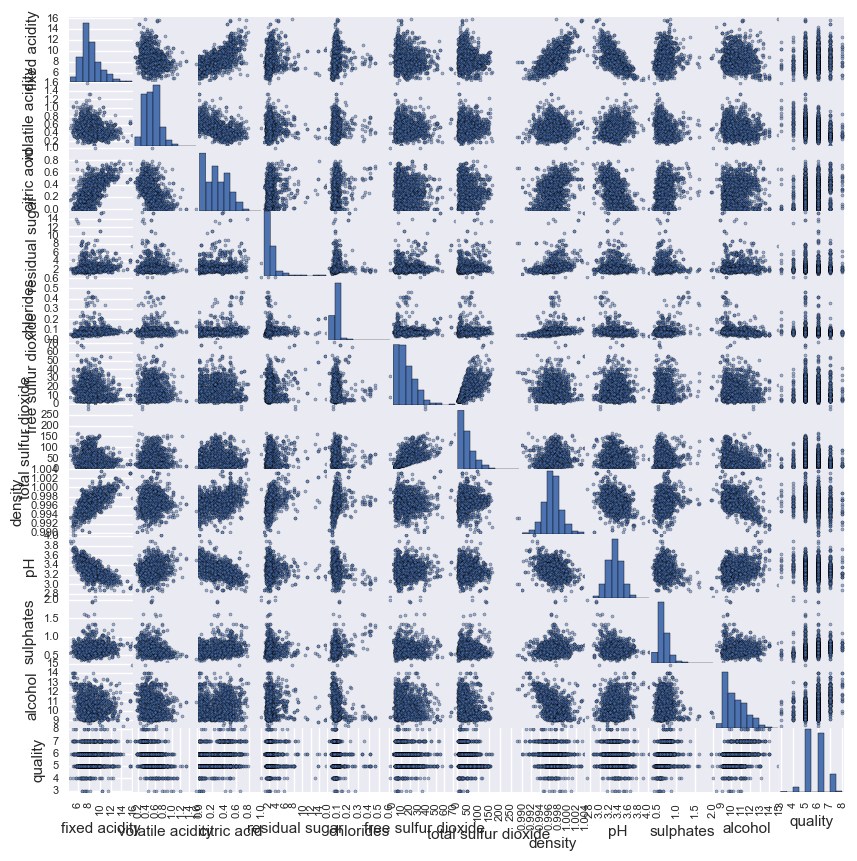

In [199]:
pd.scatter_matrix(shd, figsize=(10, 10))
plt.show()

#### 2. Do an exploratory analysis and pick at least two variables that are measured differently or have a widely different range of values.
We are going to use these variables to try to predict the wine quality.
    - Explain why you think scaling will have an impact on these variables.
    - Report any interesting observations that resulted from your EDA

In [ ]:
# Your Answer
# I choose total sulfur dioxide and chlorides


#### 3. Use Train Test Split to split your data.
#### - Create a Multi-Linear Regression and fit it with the UNSCALED x_train & y_train data.
#### - Call predict using your fitted model on your x_test data.
#### - Plot the residuals of your y_test and y_pred
#### - Observe the Summary Statistics.  
TIP: In order to maintain uniformity of your splits specify random_state

In [175]:
shd_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
shd.columns = shd_cols
print(shd.columns)
shd.describe(include='all')
shd.shape

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')


(1599, 12)

In [177]:
% matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

y = shd[['quality']]
y.shape
df = shd[['total_sulfur_dioxide','chlorides']]
df.shape

(1599, 2)

(799, 2) (799, 1)
(800, 2) (800, 1)
Score: 0.040206684867


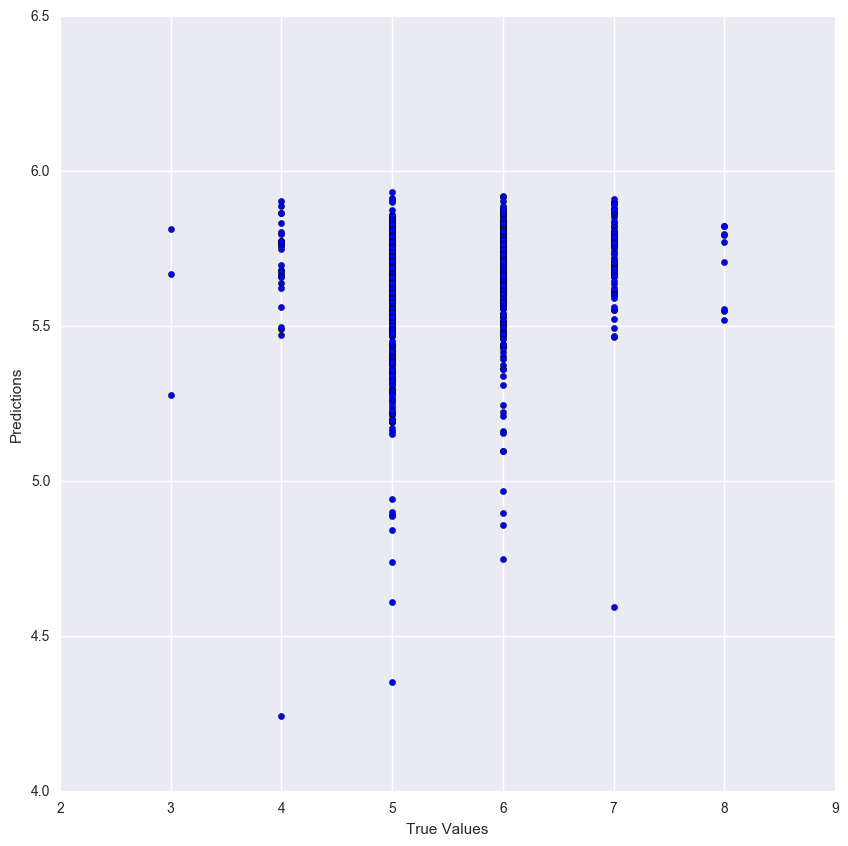

In [178]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5, random_state = 1)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) 


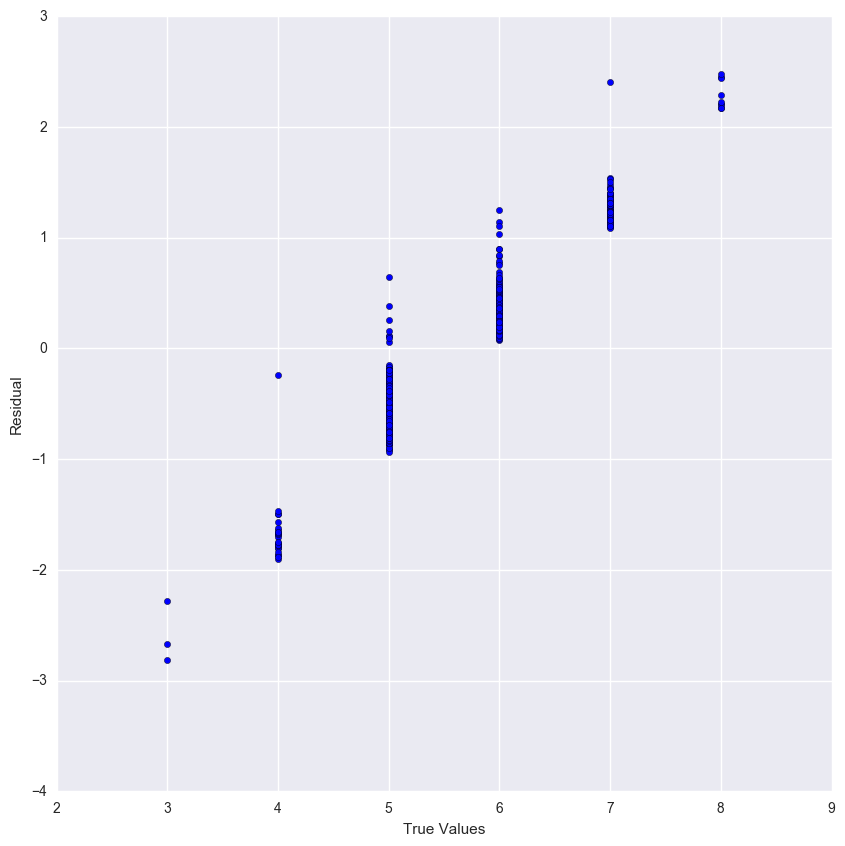

In [179]:
plt.scatter(y_test,y_test-predictions )
plt.xlabel("True Values")
plt.ylabel("Residual")


In [206]:
import statsmodels.api as sm

X = X_train
y = y_train
X=sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     23.27
Date:                Wed, 30 Nov 2016   Prob (F-statistic):           1.50e-10
Time:                        09:43:05   Log-Likelihood:                -953.17
No. Observations:                 799   AIC:                             1912.
Df Residuals:                     796   BIC:                             1926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.6391      0.028    199.439      0.000         5.584     5.695
x1            -0.1543      0.028     -5.548      0.000        -0.209    -0.100
x2            -0.1163      0.031     -3.787      0.000        -0.177    -0.056
==============================================================================
Omnibus:                       10.319   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               16.206
Skew:                          -0.020   Prob(JB):                     0.000303
Kurtosis:                       3.697   Cond. No.                         1.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4. Scale your two+ selected features using a Min-Max Scaler.

In [180]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
df_Scale = MMS.fit_transform(df)
MMSX.shape


(1599, 2)

#### 5. Use Train Test Split to split your data.
#### - Create a Multi-Linear Regression and fit it with the SCALED x_train & y_train data.
#### - Call predict using your fitted model on your x_test data.
#### - Plot the residuals of your y_test and y_pred
#### - Observe the Summary Statistics.  

(799, 2) (799, 1)
(800, 2) (800, 1)
Score: 0.040206684867


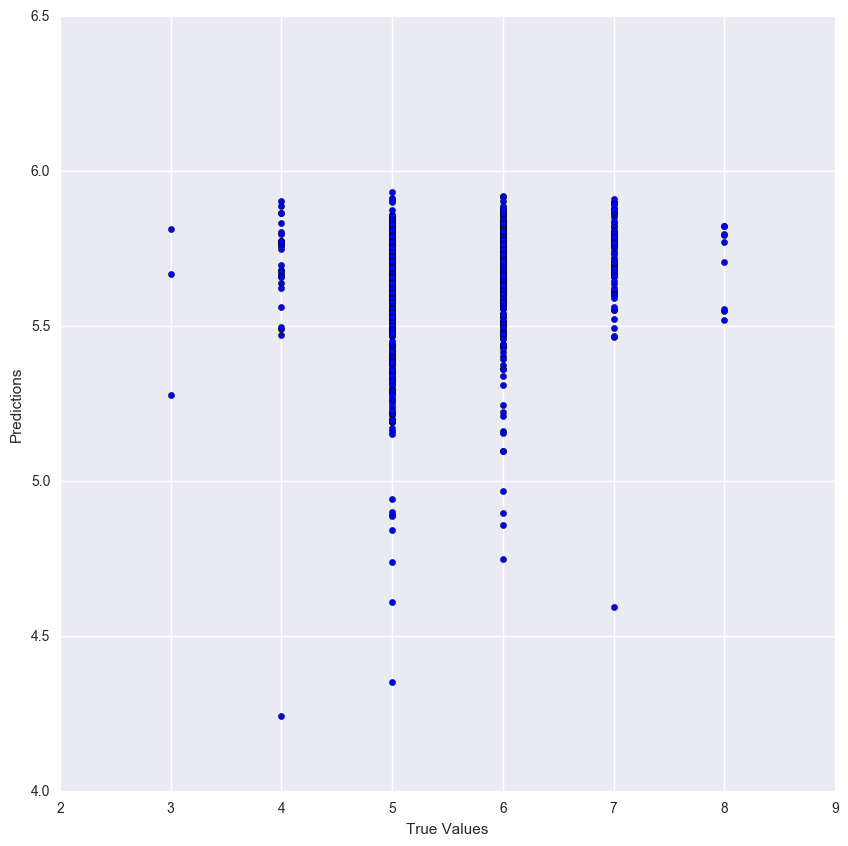

In [181]:
X_train, X_test, y_train, y_test = train_test_split(df_Scale, y, test_size=0.5,random_state = 1)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)



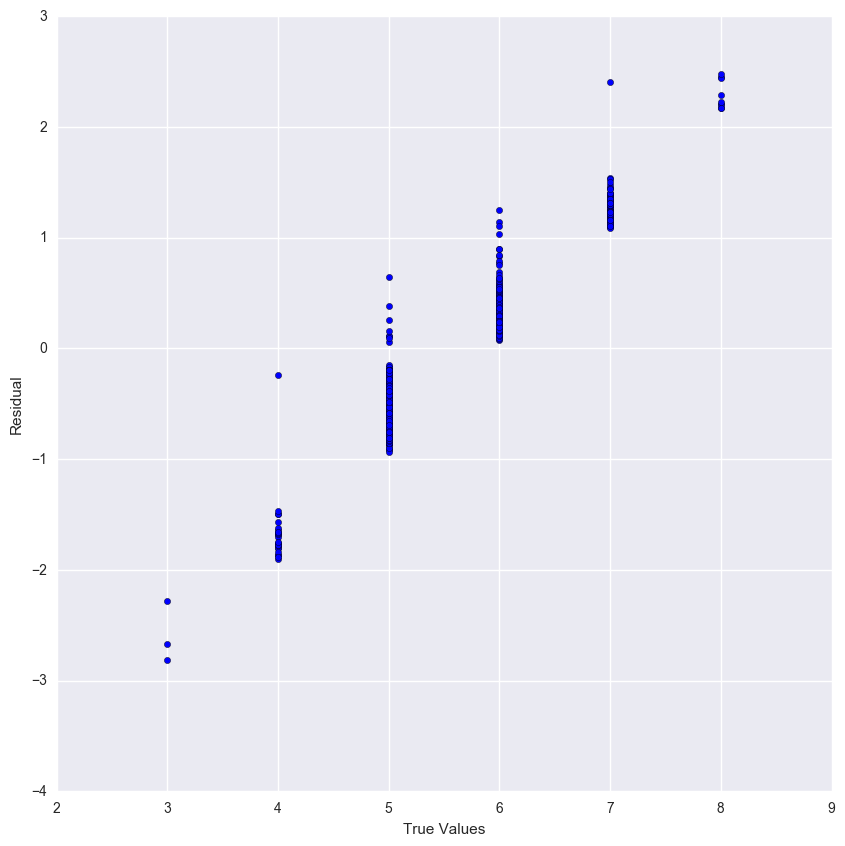

In [182]:
plt.scatter(y_test,y_test-predictions )
plt.xlabel("True Values")
plt.ylabel("Residual")

#### 6. Repeat Step 4 using standardization to scale your data. 

In [183]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

df_Scale2 = SS.fit_transform(df)

#### 7. Repeat Step 5 using standardization to scale your data. 

(799, 2) (799, 1)
(800, 2) (800, 1)
Score: 0.040206684867


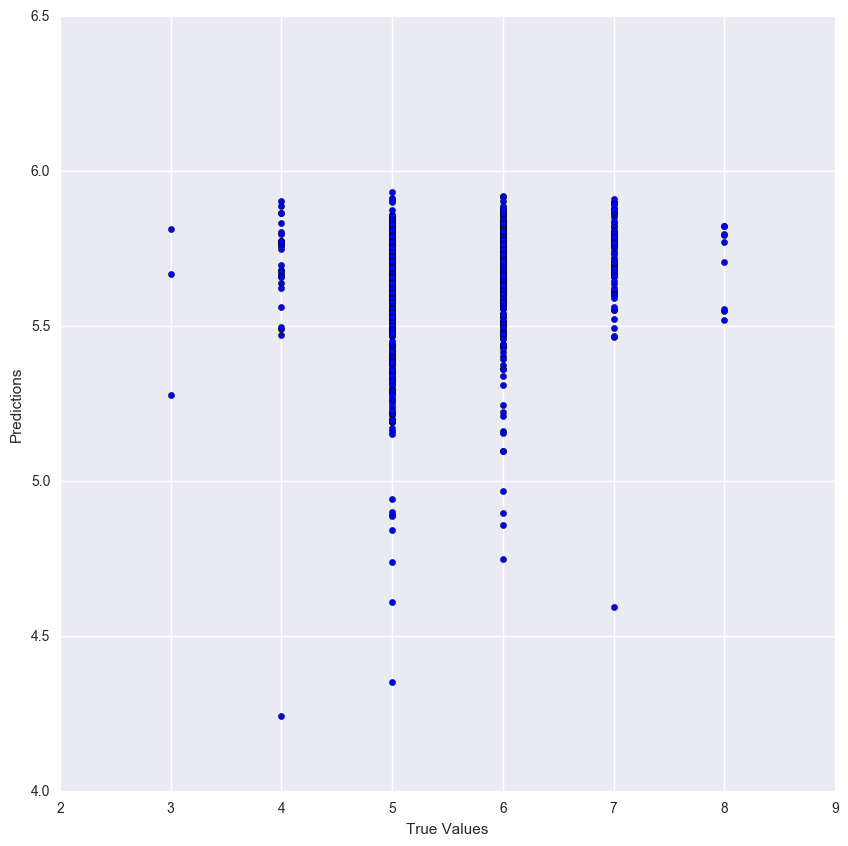

In [184]:
# Your Answer
X_train, X_test, y_train, y_test = train_test_split(df_Scale2, y, test_size=0.5,random_state = 1)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)

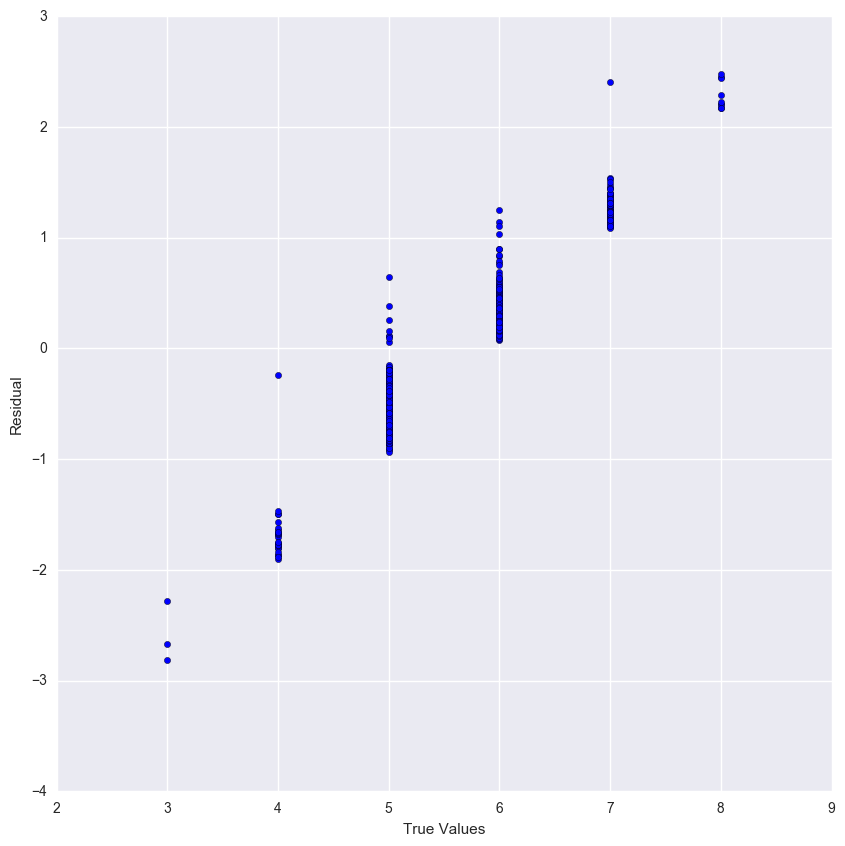

In [185]:
plt.scatter(y_test,y_test-predictions )
plt.xlabel("True Values")
plt.ylabel("Residual")

#### 8. What, if any, differences do you notice between the outputs of the scaled and unscaled data?  Which method of scaling did you find to have more of an effect on your output? Why do you think this is the case?

In [ ]:
# Your Answer
#if we do not put random_state = 1 the numbers are very different
# they use different random series


#### Bonus:  Show a visual representation of how the distribution of manually scaled data (your scaling function), automatically scaled data (sklearn) and normal data does or does not differ.
(Hint: Use 'plt.show()' to display all visualizations simultaneously)

In [204]:

import matplotlib.pyplot as plt



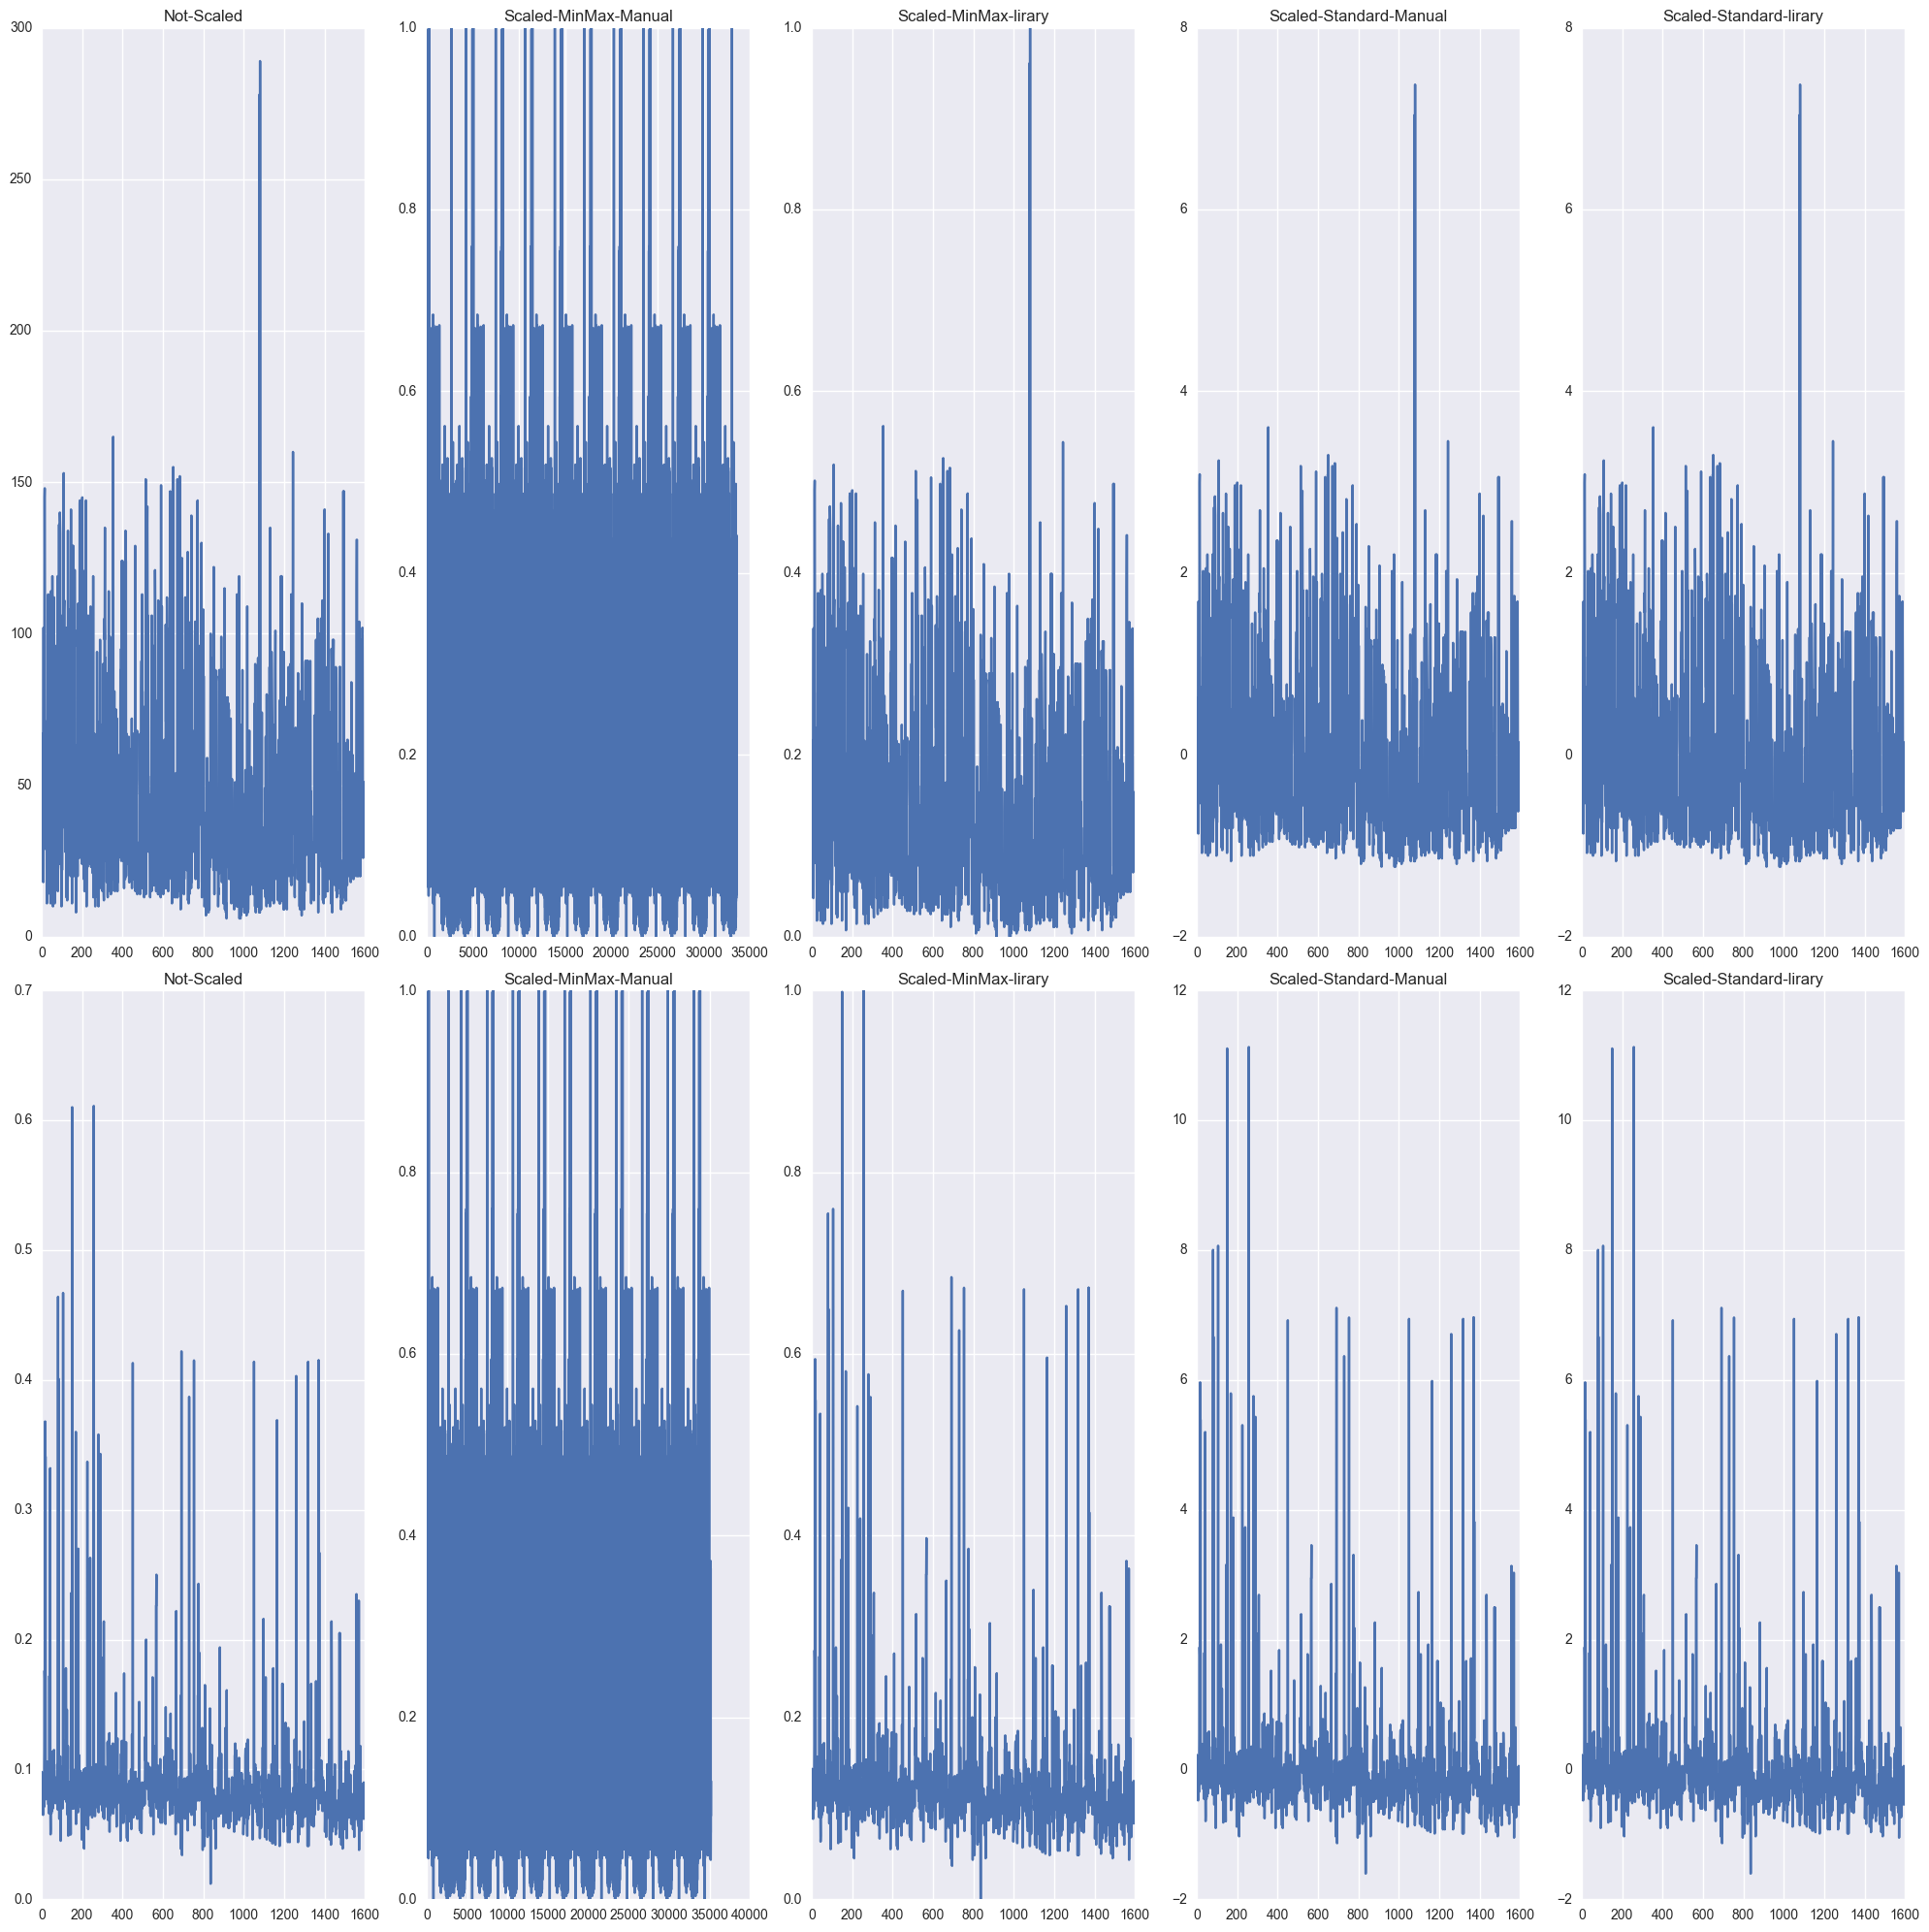

In [205]:
fig = plt.figure(figsize=(20, 20))
#--------------------------
#   First parameter ######df = shd[['total_sulfur_dioxide','chlorides']]
#--------------------------

sub1 = fig.add_subplot(251) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Not-Scaled') # non OOP: plt.title('The function f')
sub1.plot(df['total_sulfur_dioxide'])

sub2 = fig.add_subplot(252)
sub2.set_title('Scaled-MinMax-Manual')
sub2.plot(min_max_norm(df['total_sulfur_dioxide']))

sub3 = fig.add_subplot(253)
sub3.set_title('Scaled-MinMax-lirary')
sub3.plot(df_Scale[:,0])

sub4 = fig.add_subplot(254)
sub4.set_title('Scaled-Standard-Manual')
sub4.plot(standard(df['total_sulfur_dioxide']))

sub5 = fig.add_subplot(255)
sub5.set_title('Scaled-Standard-lirary')
sub5.plot(df_Scale2[:,0])

#---------------------------#
#   Second parameter
#---------------------------#

sub6 = fig.add_subplot(256) 
sub6.set_title('Not-Scaled') 
sub6.plot(df['chlorides'])

sub7 = fig.add_subplot(257)
sub7.set_title('Scaled-MinMax-Manual')
sub7.plot(min_max_norm(df['chlorides']))

sub8 = fig.add_subplot(258)
sub8.set_title('Scaled-MinMax-lirary')
sub8.plot(df_Scale[:,1])

sub9 = fig.add_subplot(259)
sub9.set_title('Scaled-Standard-Manual')
sub9.plot(standard(df['chlorides']))

sub10 = fig.add_subplot(2,5,10)
sub10.set_title('Scaled-Standard-lirary')
sub10.plot(df_Scale2[:,1])

plt.tight_layout()
plt.show()


